# 인천공항 이용자수 분석 및 예측

- 출입국 항구/내외국인/성별 국제이동(연간)
- 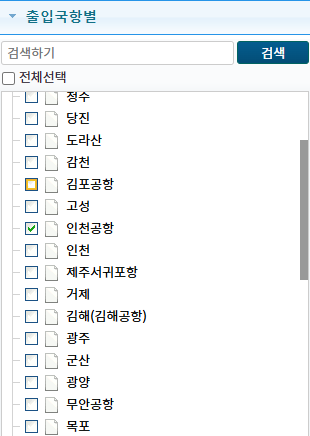
- 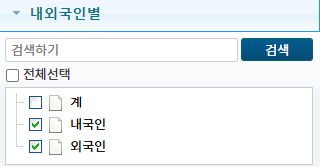
- 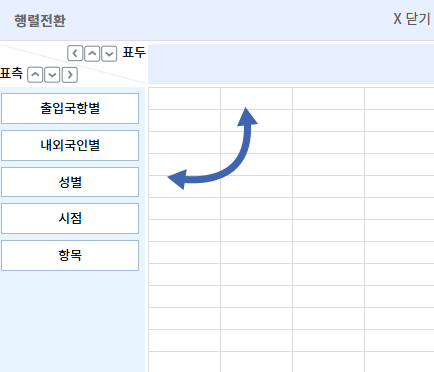 

In [24]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

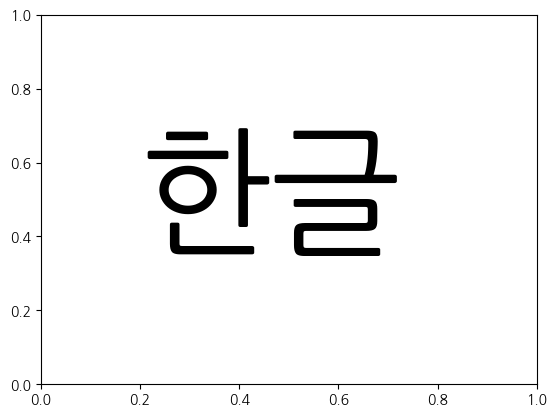

In [25]:
#윈도우용 폰트 경로 설정 
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name =fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [26]:
# csv 파일 임포트 
file_path ="./ref/출입국항구내외국인성별국제이동연간_202503051.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.tail()

,출입국항별,내외국인별,성별,시점,항목,데이터
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388
183,인천공항,외국인,여자,2023,출국자,130769


In [27]:
ex1_data = ori.copy()
ex1_data.columns =["airport","type1","gender","year","type2","value"]
#ex1_data.rename(columns={"",""})
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [28]:
#필터제작 
filter1 = ex1_data['type1']=='외국인'
ex2_data = ex1_data[filter1].copy()
ex2_data

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [29]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head()

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717


In [30]:
filter2 = ex2_data['type2'] == '입국자'
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2'] == '출국자'
ex3_filtered = ex2_data[filter3]

ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")


<Axes: title={'center': '2021년~2023년 인천공항 입국 외국인 차트'}>

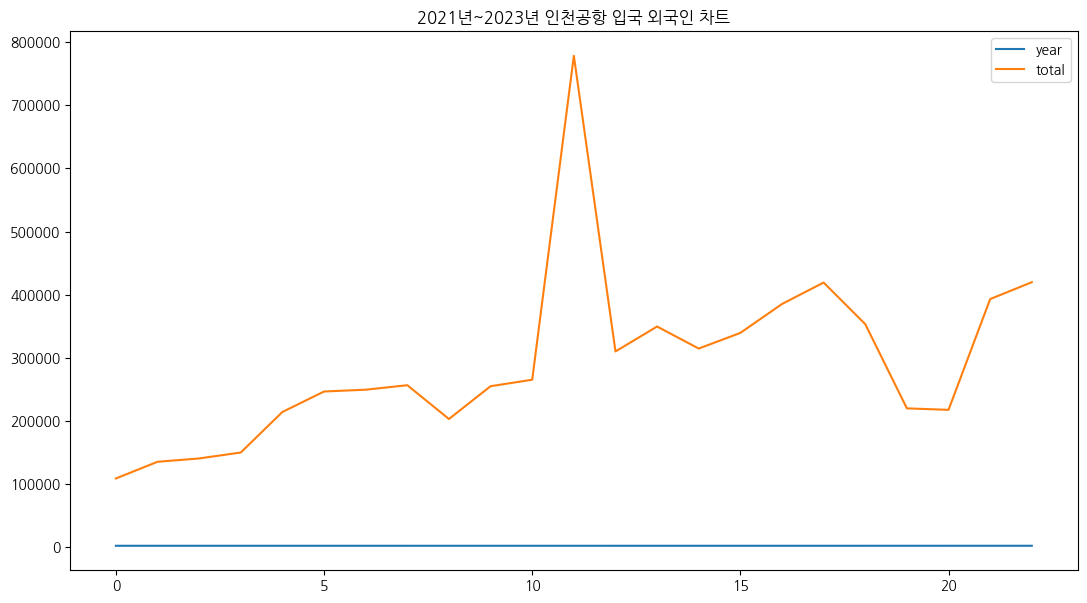

In [31]:
ex2_data.plot(figsize=(13,7),title="2021년~2023년 인천공항 입국 외국인 차트")

<Axes: title={'center': '2021~2023년 인천공항 출국 외국인 차트'}>

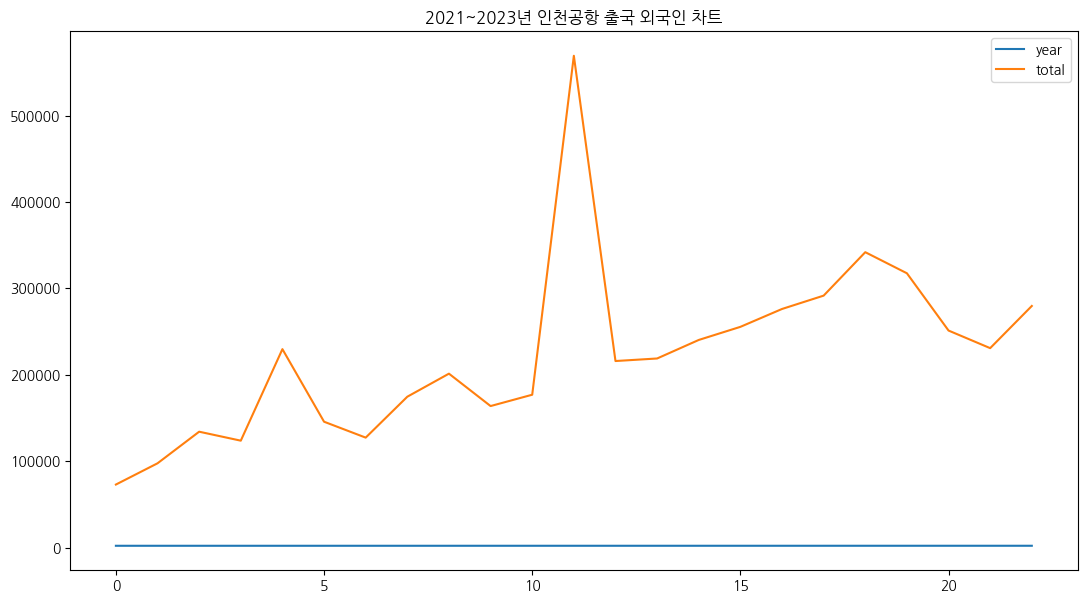

In [32]:
ex3_data.plot(figsize=(13,7),title="2021~2023년 인천공항 출국 외국인 차트")

In [ ]:
# !pip install prophet 
# !pip install --upgrade plotly 
# !pip install --upgrade jupyter ipywidgets

In [34]:
from prophet import Prophet 

In [35]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다 
ex4_data = ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'],format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})
ex4_data.tail()

,ds,y
18,2019-01-01,1198598
19,2020-01-01,1129092
20,2021-01-01,867277
21,2022-01-01,1073387
22,2023-01-01,1124211


In [36]:
m = Prophet()
m.fit(ex4_data)

12:48:19 - cmdstanpy - INFO - Chain [1] start processing
12:48:19 - cmdstanpy - INFO - Chain [1] done processing


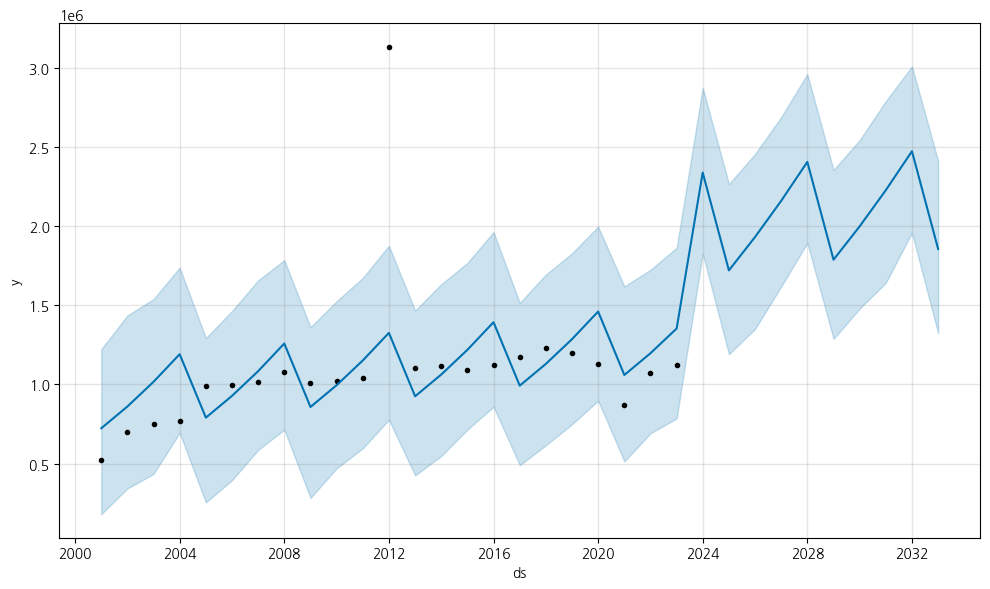

<Figure size 1000x1500 with 0 Axes>

In [37]:
future = m.make_future_dataframe(periods=10,freq='YE') #10년 후까지의 데이터 예측 
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/예측.png")
plt.figure(figsize=(10,15))
plt.show()

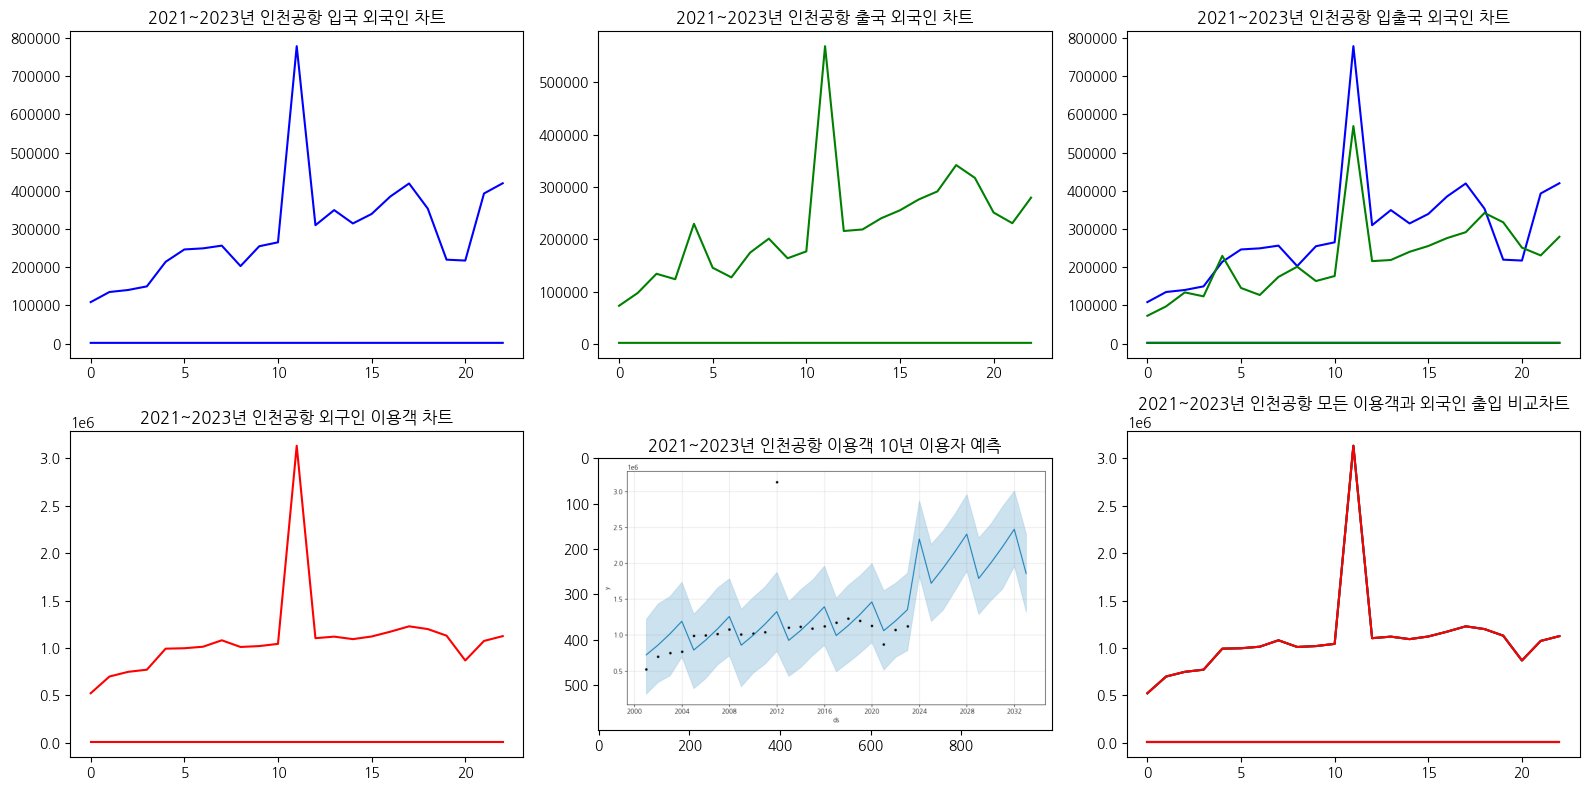

In [40]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
#이미지 불러오기 
img = mpimg.imread("./chart/예측.png")

fig, axs = plt.subplots(2,3,figsize=(16,8)) # 2 x 2 서브플롯 생성 

axs[0,0].plot(ex2_data,color="b")
axs[0,1].plot(ex3_data,color="g")
axs[0,2].plot(ex2_data,color="b")
axs[0,2].plot(ex3_data,color="g")
axs[1,0].plot(ex1_data,color="r")
axs[1,2].plot(ex1_data,color="b")
axs[1,2].plot(ex1_data,color="g")
axs[1,2].plot(ex1_data,color="r")
axs[0,0].set_title("2021~2023년 인천공항 입국 외국인 차트")
axs[0,1].set_title("2021~2023년 인천공항 출국 외국인 차트")
axs[0,2].set_title("2021~2023년 인천공항 입출국 외국인 차트")
axs[1,0].set_title("2021~2023년 인천공항 외구인 이용객 차트")
axs[1,1].set_title("2021~2023년 인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2021~2023년 인천공항 모든 이용객과 외국인 출입 비교차트")

axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()